In [1]:
import numpy as np
import pylab as py
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df=pd.read_csv("titanic.csv")

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df=df.drop('Cabin',axis=1)
    
    

In [54]:
df['Age'].median()

28.0

In [55]:
df['Age']=df['Age'].fillna(value='28')

In [56]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [57]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [58]:
df['Embarked']=df['Embarked'].fillna(value='S')

In [59]:
df=df.drop(['Name','Ticket','PassengerId'],axis=1)

In [60]:
df[:1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.25,S


In [61]:
df=pd.get_dummies(df,columns=['Pclass','Sex','Embarked'])

In [62]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [63]:
df[:1]

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22,1,0,7.25,0,0,1,0,1,0,0,1


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [65]:
X=df.iloc[:,1:]

In [66]:
y=df['Survived']

In [67]:
df.corr()

,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.035322,0.081629,0.257307,0.285904,0.093349,-0.322308,0.543351,-0.543351,0.168240,0.003650,-0.149683
SibSp,-0.035322,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.092548,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.015790,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.257307,0.159651,0.216225,1.000000,0.591711,-0.118557,-0.413333,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Pclass_1,0.285904,-0.054582,-0.017633,0.591711,1.000000,-0.288585,-0.626738,0.098013,-0.098013,0.296423,-0.155342,-0.161921
Pclass_2,0.093349,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,-0.565210,0.064746,-0.064746,-0.125416,-0.127301,0.189980
Pclass_3,-0.322308,0.092548,0.015790,-0.413333,-0.626738,-0.565210,1.000000,-0.137143,0.137143,-0.153329,0.237449,-0.015104
Sex_female,0.543351,0.114631,0.245489,0.182333,0.098013,0.064746,-0.137143,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_male,-0.543351,-0.114631,-0.245489,-0.182333,-0.098013,-0.064746,0.137143,-1.000000,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,0.168240,-0.059528,-0.011069,0.269335,0.296423,-0.125416,-0.153329,0.082853,-0.082853,1.000000,-0.148258,-0.782742


In [68]:
df.corr()>0.75

,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,True,False,False,False,False,False,False,False,False,False,False,False
SibSp,False,True,False,False,False,False,False,False,False,False,False,False
Parch,False,False,True,False,False,False,False,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False,False,False,False,False
Pclass_1,False,False,False,False,True,False,False,False,False,False,False,False
Pclass_2,False,False,False,False,False,True,False,False,False,False,False,False
Pclass_3,False,False,False,False,False,False,True,False,False,False,False,False
Sex_female,False,False,False,False,False,False,False,True,False,False,False,False
Sex_male,False,False,False,False,False,False,False,False,True,False,False,False
Embarked_C,False,False,False,False,False,False,False,False,False,True,False,False


In [69]:
df.var()    ###We can remove the future which has very less variance as it wont be significant in detecting the underlying variance of target

Survived         0.236772
SibSp            1.216043
Parch            0.649728
Fare          2469.436846
Pclass_1         0.183861
Pclass_2         0.164047
Pclass_3         0.247670
Sex_female       0.228475
Sex_male         0.228475
Embarked_C       0.153172
Embarked_Q       0.079040
Embarked_S       0.199586
dtype: float64

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [71]:
# Initialize the model
dtree = DecisionTreeClassifier(criterion="entropy", random_state=101,max_depth=5, min_samples_leaf=5)

In [72]:
# Training
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [48]:
df.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [73]:
# Predictions
pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [76]:
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print ("train acc: {0:.2f}, test acc: {1:.2f}".format(train_acc, test_acc))

train acc: 0.84, test acc: 0.79


In [78]:
# Calculate other evaluation metrics 
precision, recall, F1, _ = precision_recall_fscore_support(y_test, pred_test, average="binary")
print ("precision: {0:.2f}. recall: {1:.2f}, F1: {2:.2f}".format(precision, recall, F1))


precision: 0.82. recall: 0.64, F1: 0.72


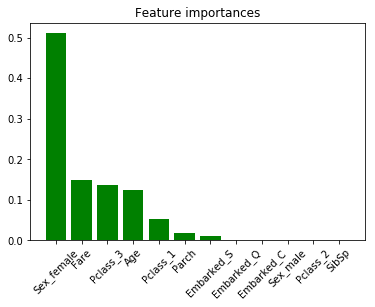

Sex_female - 0.511
Fare - 0.148
Pclass_3 - 0.137
Age - 0.123
Pclass_1 - 0.053
Parch - 0.018
Embarked_S - 0.011
Embarked_Q - 0.000
Embarked_C - 0.000
Sex_male - 0.000
Pclass_2 - 0.000
SibSp - 0.000


In [80]:
# Feature importances
features = list(X_test.columns)
importances = dtree.feature_importances_
indices = np.argsort(importances)[::-1]
num_features = len(importances)

# Plot the feature importances of the tree
plt.figure()
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], color="g", align="center")
plt.xticks(range(num_features), [features[i] for i in indices], rotation='45')
plt.xlim([-1, num_features])
plt.show()

# Print values
for i in indices:
    print ("{0} - {1:.3f}".format(features[i], importances[i]))


In [81]:
# Install necessary packages
!apt-get install graphviz
!pip install pydotplus

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


  Running setup.py bdist_wheel for pydotplus: started
  Running setup.py bdist_wheel for pydotplus: finished with status 'done'
  Stored in directory: C:\Users\LENOVO\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [88]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [89]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

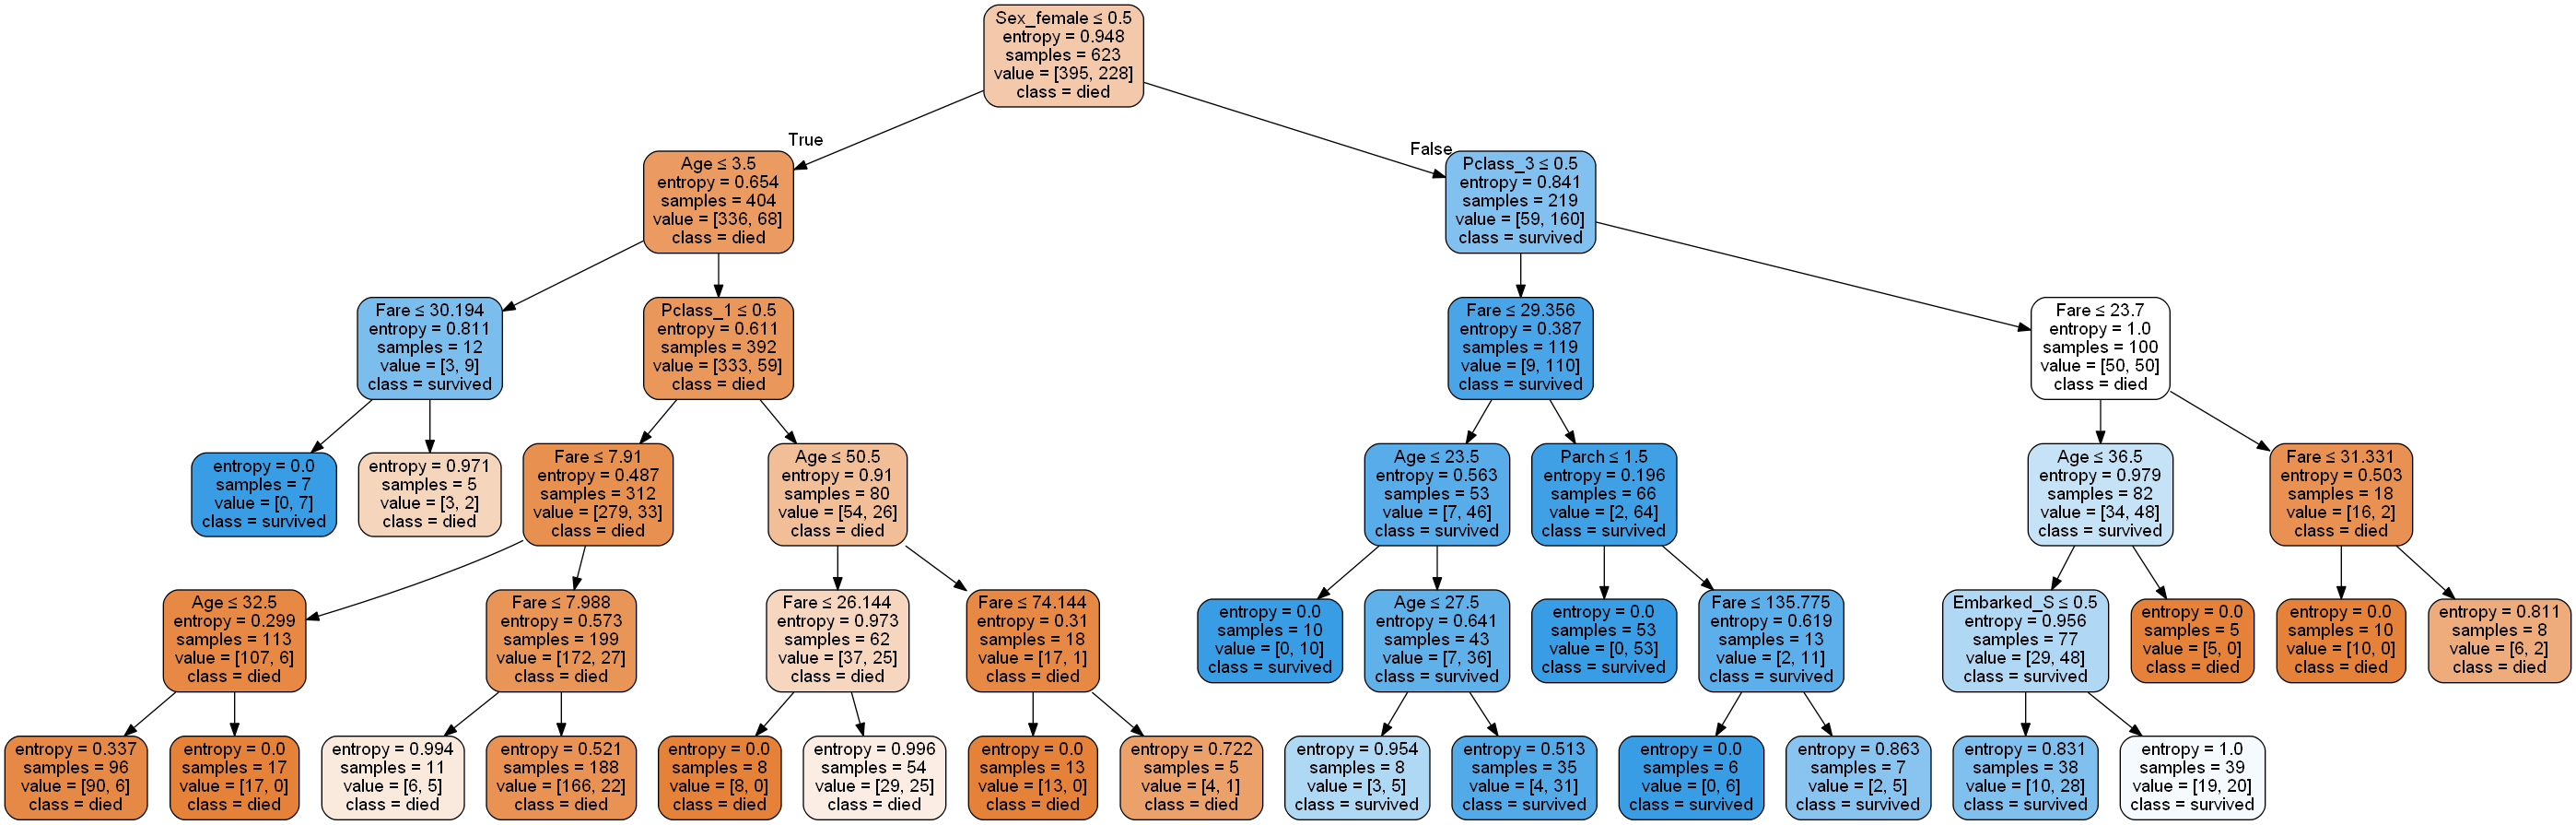

In [91]:
# Interpretability
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, 
                feature_names=list(df.drop(['Survived'], axis=1)), 
                class_names = ['died', 'survived'],
                rounded = True, filled= True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=5000, height=3000)

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 50],
    'max_features': [len(features)],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 8],
    'n_estimators': [5, 10, 50] # of trees
}

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
# Initialize random forest
forest = RandomForestClassifier()

In [105]:
# Instantiate grid search
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=3, 
                           n_jobs=-1, verbose=1)

In [106]:
# Fit grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   16.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [10, 20, 50], 'max_features': [12], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [4, 8], 'n_estimators': [5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [107]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 12,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 5}

In [108]:
# Train using best parameters
best_forest = grid_search.best_estimator_
best_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [109]:
# Predictions
pred_train = best_forest.predict(X_train)
pred_test = best_forest.predict(X_test)

In [110]:
# Accuracy
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print ("train acc: {0:.2f}, test acc: {1:.2f}".format(train_acc, test_acc))

# Calculate other evaluation metrics 
precision, recall, F1, _ = precision_recall_fscore_support(y_test, pred_test, average="binary")
print ("precision: {0:.2f}. recall: {1:.2f}, F1: {2:.2f}".format(precision, recall, F1))

train acc: 0.86, test acc: 0.78
precision: 0.80. recall: 0.65, F1: 0.72
